In [42]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import os

#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [ ]:
#plt.style.use('default')
#plt.style.use('fivethirtyeight')
plt.style.use('bmh')


In [91]:
df_orders = pd.read_csv("../data/clean/orders.csv")
df = pd.read_csv("../data/clean/aggregate_df.csv")

In [5]:
df = pd.read_csv("../data/clean/aggregate_df.csv")

df_customers = pd.read_csv("../data/clean/customers.csv")
df_orders = pd.read_csv("../data/clean/orders.csv")
df_items = pd.read_csv("../data/clean/order_items.csv")
df_products = pd.read_csv("../data/clean/products.csv")

df_customers.head(), df_orders.head(), df_items.head(), df_products.head()

(   Customers.id Customers.fname Customers.lname Customers.company  \
 0           797         Christy            Dill          Company0   
 1             3            John           Smith          Company1   
 2             4           James        Anderson        Individual   
 3             5         Abraham          Pollak          Company3   
 4             7          Peggy         Thompson        Individual   
 
   Customers.create_date  Customers.mailing Customers.last_modified  
 0   2015-03-10 20:18:44                  0     2015-07-24 18:58:26  
 1   2013-12-03 16:45:39                  0     2015-07-24 18:59:14  
 2   2013-12-11 16:44:23                  0     2015-07-24 18:30:46  
 3   2013-12-12 15:19:59                  0     2015-07-24 18:58:36  
 4   2013-12-27 14:52:27                  0     2015-07-24 18:46:57  ,
    Orders.id  Orders.customer_id Orders.company Orders.order_number  \
 0       3758                 797       Company0                3758   
 1         23

In [37]:
print("=== MAIN DF ===")
df.info()
print("\n=== CUSTOMERS ===")
df_customers.info()
print("\n=== ORDERS ===")
df_orders.info()
print("\n=== ORDER ITEMS ===")
df_items.info()
print("\n=== PRODUCTS ===")
df_products.info()

=== MAIN DF ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Customers.id                   4194 non-null   object  
 1   Customers.fname                4194 non-null   object  
 2   Customers.lname                4194 non-null   object  
 3   Customers.company              4194 non-null   object  
 4   Customers.create_date          4194 non-null   object  
 5   Customers.mailing              4194 non-null   int64   
 6   Customers.last_modified        4194 non-null   object  
 7   Orders.id                      4194 non-null   object  
 8   Orders.customer_id             4194 non-null   object  
 9   Orders.company                 730 non-null    object  
 10  Orders.order_number            4194 non-null   object  
 11  Orders.reorder_id              82 non-null     object  
 12  Orders.subtotal   

In [7]:
df.head(20)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.customer_id,Orders.company,...,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_color,Products.unit,Products.case_qty,Products.family_id
0,797,Christy,Dill,Company0,2015-03-10 20:18:44,0,2015-07-24 18:58:26,3758,797,Company0,...,57.64,NaN,44.00,2016-05-13 18:05:23,1.0,MEDLINE,Green,EA,1.0,PF61071
1,3,John,Smith,Company1,2013-12-03 16:45:39,0,2015-07-24 18:59:14,23,3,Company1,...,10.29,5.00,1.87,2016-05-04 13:52:35,1.0,MEDLINE,NaN,EA,1.0,PF02132
2,3,John,Smith,Company1,2013-12-03 16:45:39,0,2015-07-24 18:59:14,9531,3,Company1,...,68.78,NaN,52.50,2016-05-13 18:05:23,1.0,MEDLINE,Blue,CS,800.0,PF00342
3,4,James,Anderson,Individual,2013-12-11 16:44:23,0,2015-07-24 18:30:46,29,4,NaN,...,19.56,NaN,12.62,2016-05-07 04:31:15,1.0,MEDLINE,NaN,EA,1.0,PF04970
4,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0,2015-07-24 18:58:36,30,5,Company3,...,36.05,NaN,25.75,2016-05-04 13:52:35,1.0,ROSCOE MEDICAL INC,NaN,EA,1.0,PF03045
5,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0,2015-07-24 18:58:36,226,5,Company3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0,2015-07-24 18:58:36,1658,5,Company3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Peggy,Thompson,Individual,2013-12-27 14:52:27,0,2015-07-24 18:46:57,32,7,NaN,...,39.19,NaN,27.99,2016-05-04 13:52:35,1.0,MEDLINE,NaN,CS,1920.0,PF01527
8,8,Randy,Pruss,Individual,2014-01-09 21:33:36,0,2015-07-24 18:43:41,40,8,NaN,...,60.21,NaN,45.96,2016-05-04 13:52:35,1.0,MEDLINE,NaN,EA,1.0,PF04706
9,10,Tommy,Smith,Individual,2014-01-23 20:38:36,0,2015-07-24 18:45:53,70,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# overview of the dataframe
    
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(4194, 55)

'Description'

,count,mean,std,min,25%,50%,75%,max
Customers.id,4194.0,1796.52,1065.68,3.00,865.25,1747.50,2698.75,3736.00
Customers.mailing,4194.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
Orders.id,4194.0,9142.98,5276.54,23.00,4258.00,9641.00,14011.75,17437.00
Orders.customer_id,4194.0,1796.52,1065.68,3.00,865.25,1747.50,2698.75,3736.00
Orders.reorder_id,82.0,7389.16,3818.09,30.00,4537.25,6887.00,10832.00,16201.00
Orders.subtotal,4194.0,131.93,231.16,2.89,36.75,74.74,139.96,5163.04
Orders.tax,4194.0,0.71,4.59,0.00,0.00,0.00,0.00,132.93
Orders.shipping,4194.0,6.81,4.67,0.00,0.00,9.95,9.95,32.81
Orders.coupon_id,882.0,20.40,11.85,4.00,11.00,26.00,32.00,48.00
Orders.coupon_amount,882.0,9.97,14.62,0.00,0.68,5.00,12.24,109.90


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Customers.id,int64,0,3054,"[558, 2224, 1259]"
Customers.fname,object,0,1501,"[Janice, Tomorra , Amanda]"
Customers.lname,object,0,2482,"[Hart, Flanagan, Ladd]"
Customers.company,object,0,429,"[Individual, Company186, Individual]"
Customers.create_date,object,0,3054,"[2015-08-07 18:15:06, 2014-11-12 15:11:08, 201..."
Customers.mailing,int64,0,2,"[0, 1, 1]"
Customers.last_modified,object,0,3054,"[2016-05-05 14:48:20, 2015-07-24 18:47:59, 201..."
Orders.id,int64,0,3565,"[306, 5804, 3966]"
Orders.customer_id,int64,0,3054,"[396, 349, 1796]"
Orders.company,object,3464,428,"[nan, nan, nan]"


In [92]:
### ---  Column structuring --- 

id_list = ['Customers.id', 'Orders.id', 'Orders.customer_id', 'Orders.order_number', 'Orders.reorder_id',
           'Orders.coupon_id', 'Orders.reorder_id',
          'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 
          'Products.id',  'Products.import_id', 'Products.family_id'
        ]		

text_list = ['Customers.fname', 'Customers.lname',
            'Customers.company', 
            'Orders.company', 'Orders.discount_name',
            'Orders.shipping_method', 
            'Order_Items.product_name', 
            'Products.shopping_color'
            ]

integer_list = ['Customers.mailing', 'Order_Items.qty', 'Order_Items.reorder_frequency', 'Products.taxable'
                ]

category_list = ['Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.payment_method',
                'Orders.payment_status', 'Orders.status', 'Products.status', 
                'Products.vendor', 'Products.shopping_brand'
                ]



In [93]:
## ---  Check unique counts: FLAGs ---

df.nunique()[ (df.nunique() > 1) & (df.nunique() < 10) ]


Customers.mailing                2
Orders.payment_status            3
Orders.payment_method            5
Order_Items.reorder_frequency    4
Products.status                  5
Products.vendor                  8
Products.taxable                 2
dtype: int64

In [94]:
# check vendor unique values

df['Orders.status'].unique()

array([ 1,  3, 12,  4, 14,  5,  0, 15,  2,  8])

In [95]:
### update order status values

order_status_map = {
    1:  "Completed",
    0:  "Pending",
    3:  "Shipped",
    4:  "Cancelled",
    5:  "Refunded",
    8:  "Error",
    12: "On Hold",
    14: "Validation Required",
    15: "Unknown"
}

df_orders['Orders.status'] = df_orders['Orders.status'].map(order_status_map)
df['Orders.status'] = df['Orders.status'].map(order_status_map)

In [112]:
df_orders['Orders.status'].value_counts(dropna=False)

Orders.status
Completed              3317
Refunded                111
Shipped                  57
Cancelled                24
Pending                  22
Validation Required      17
On Hold                  12
Unknown                   3
Error                     1
NaN                       1
Name: count, dtype: int64

In [100]:
#df_orders['Orders.payment_status'].value_counts(dropna=False)

payment_status_map = {
    3.0: "Paid",
    1.0: "Pending",
    0.0: "Unpaid"
}

df_orders['Orders.payment_status'] = df_orders['Orders.payment_status'].map(payment_status_map).fillna("Unknown")
df['Orders.payment_status'] = df['Orders.payment_status'].map(payment_status_map).fillna("Unknown")

In [111]:
df['Orders.payment_status'].value_counts(dropna=False)

Orders.payment_status
Paid       4115
Pending      50
Unpaid       24
Unknown       5
Name: count, dtype: int64

In [110]:
print(df_orders['Orders.payment_status'].unique())


['Paid', 'Unpaid', 'Unknown', 'Pending']
Categories (4, object): ['Paid', 'Pending', 'Unknown', 'Unpaid']


In [106]:
#df_products['Products.status'].value_counts(dropna=False)

product_status_map = {
    0.0: "Active",
    3.0: "Discontinued",
    2.0: "Out of Stock",
    1.0: "New",
    5.0: "Archived"
}

#df_products['Products.status'] = (
#    df_products['Products.status']
#    .map(product_status_map)
#    .fillna("Unknown")
#)

df['Products.status'] = (
    df['Products.status']
    .map(product_status_map)
    .fillna("Unknown")
)

In [109]:
df['Products.status'].value_counts(dropna=False)

Products.status
Active          2647
Discontinued    1221
Unknown          157
Out of Stock     129
New               34
Archived           6
Name: count, dtype: int64

In [108]:
dfs = [df, df_orders, df_customers, df_items, df_products]

for data in dfs:
    for col in id_list:
        if col in data.columns:
            data[col] = data[col].astype("object")

    for col in category_list:
        if col in data.columns:
            data[col] = data[col].astype("category")


df['Customers.mailing'] = df['Customers.mailing'].astype("int64")   

In [152]:
backup_df = df.copy()
backup_df_orders = df_orders.copy()
backup_df_customers = df_customers.copy()
backup_df_items = df_items.copy()
backup_df_products = df_products.copy()

In [ ]:
# df = 

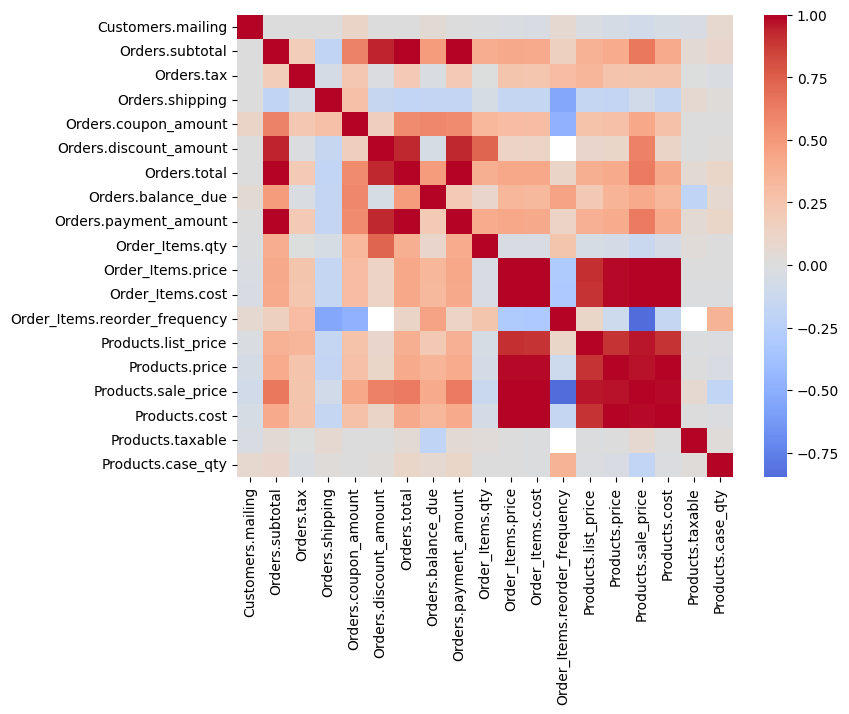

In [71]:
plt.figure(figsize=(8, 6), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.show()

In [148]:
print("Customers: ", df_customers['Customers.id'].nunique())

business_customers = (df_customers['Customers.company'] != "Individual").sum()
print("Business Customers:", business_customers)

business_company = df_customers['Customers.company'].nunique() - 1
print("Business Company: ", business_company)

individual_customers = (df_customers['Customers.company'] == "Individual").sum()
print("Individual Customers:", individual_customers) 

Customers:  3054
Business Customers: 464
Business Company:  428
Individual Customers: 2590


In [161]:
#df['customer_type'] = df['Customers.company'].str.lower().str.strip()
#del df['customer_type']

df['is_individual'] = df['Customers.company'] == "Individual"

df['is_business'] = df['Customers.company'] != "Individual"

In [165]:
individual_revenue = df[df['is_individual']]['Orders.total'].sum()
print("Individual revenue:", individual_revenue, "USD")

business_revenue = df[df['is_business']]['Orders.total'].sum()
print("Business revenue:", business_revenue, "USD")

Individual revenue: 411659.19 USD
Business revenue: 163727.49 USD


In [170]:
total_revenue = df['Orders.total'].sum()

print("Individual share:", round((individual_revenue / total_revenue * 100),2), "%")
print("Business share:", round((business_revenue / total_revenue * 100),2), "%")

Individual share: 71.54 %
Business share: 28.46 %


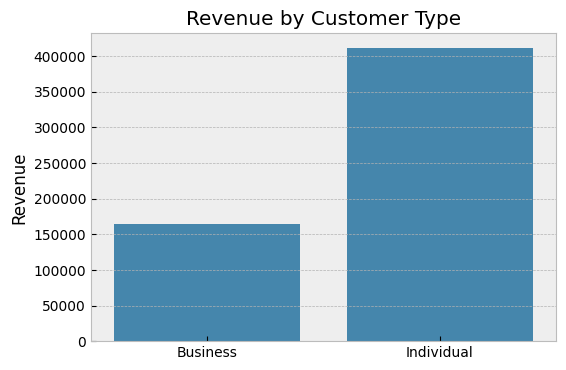

In [184]:
revenue_data = {
    "Business": business_revenue,
    "Individual": individual_revenue
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(revenue_data.keys()), y=list(revenue_data.values()))
plt.title("Revenue by Customer Type")
plt.ylabel("Revenue")
plt.show()

In [197]:
payment_method_segment = df.groupby(['Orders.payment_method', 'is_business']).size().unstack(fill_value=0)
payment_method_segment

C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\4101088701.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_method_segment = df.groupby(['Orders.payment_method', 'is_business']).size().unstack(fill_value=0)


is_business,False,True
Orders.payment_method,,
Cash,2,0
Check,20,9
Credit Card,356,17
PayPal,265,53
authorize.net,2809,645


C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\3053164263.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_method_segment = df.groupby(['Orders.payment_method', 'is_business']).size().unstack(fill_value=0)


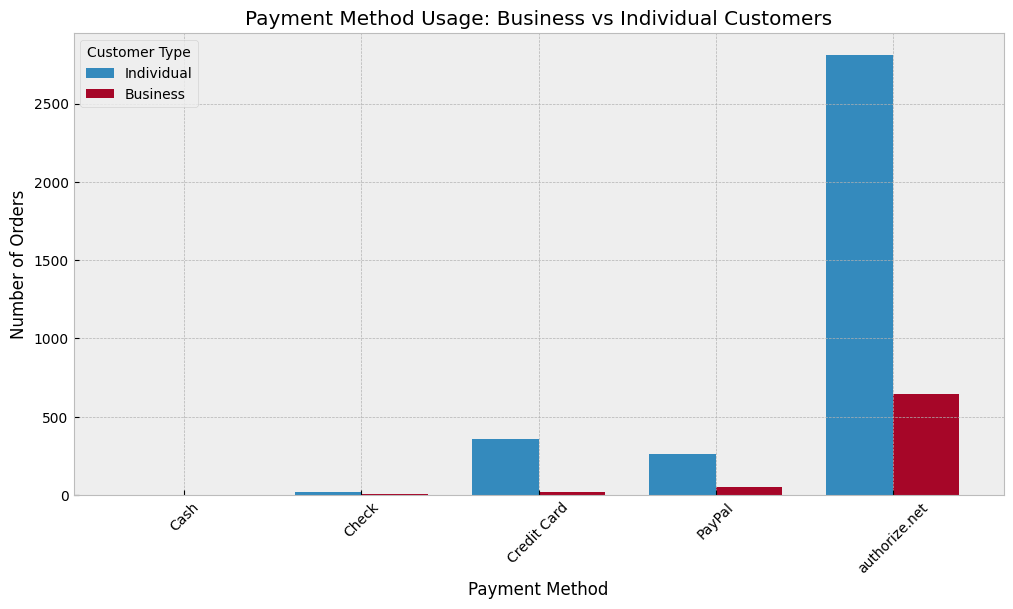

In [195]:
payment_method_segment = df.groupby(['Orders.payment_method', 'is_business']).size().unstack(fill_value=0)
payment_method_segment.columns = ['Individual', 'Business']  

payment_method_segment.plot(
    kind='bar',
    figsize=(12, 6),
    width=0.75
)

plt.title('Payment Method Usage: Business vs Individual Customers')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')

plt.show()

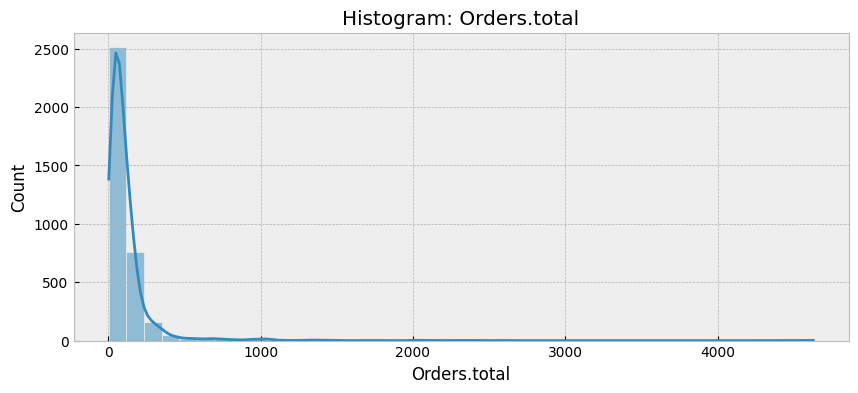

In [185]:
plt.figure(figsize=(10,4))
sns.histplot(df_orders['Orders.total'], bins=40, kde=True)
plt.title("Histogram: Orders.total")
plt.xlabel("Orders.total")
plt.ylabel("Count")
plt.show()

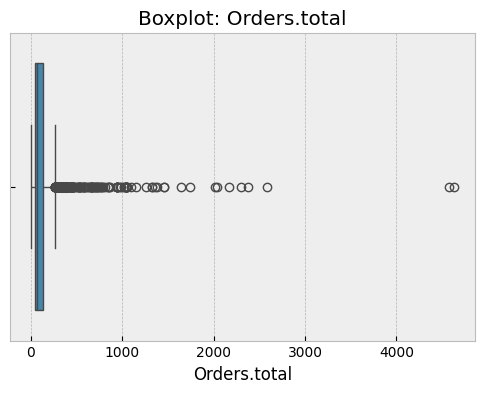

In [186]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_orders['Orders.total'])
plt.title("Boxplot: Orders.total")
plt.xlabel("Orders.total")
plt.show()

In [36]:
### --- outliers investigation ---
#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]

,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
473,2144,442,4627.95,4627.95
2936,14924,3006,4575.00,4575.00
3129,15657,3234,2588.00,2588.00
2035,10729,2022,2375.59,2375.59
128,572,143,2300.00,2300.00
3083,15457,3174,2164.30,2164.30
1931,9742,1918,2031.93,2031.93
2510,12835,2539,2017.92,NaN
2511,12836,2540,1740.00,580.00
203,965,218,1647.06,1548.06


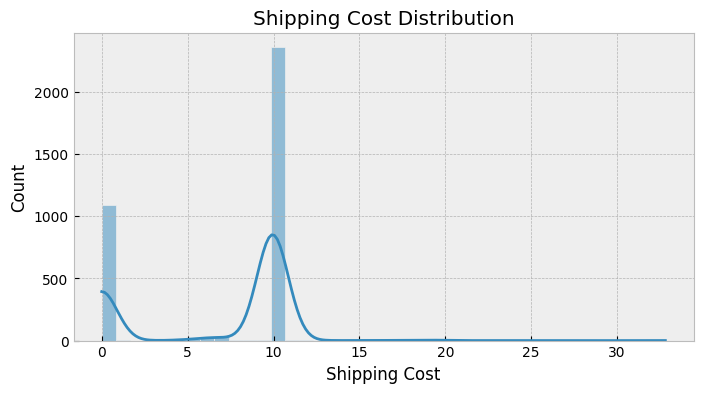

In [187]:
plt.figure(figsize=(8, 4))

sns.histplot(
    df_orders,
    x='Orders.shipping',
    bins=40,
    kde=True
)

plt.title('Shipping Cost Distribution')
plt.xlabel('Shipping Cost')
plt.ylabel('Count')
plt.show()

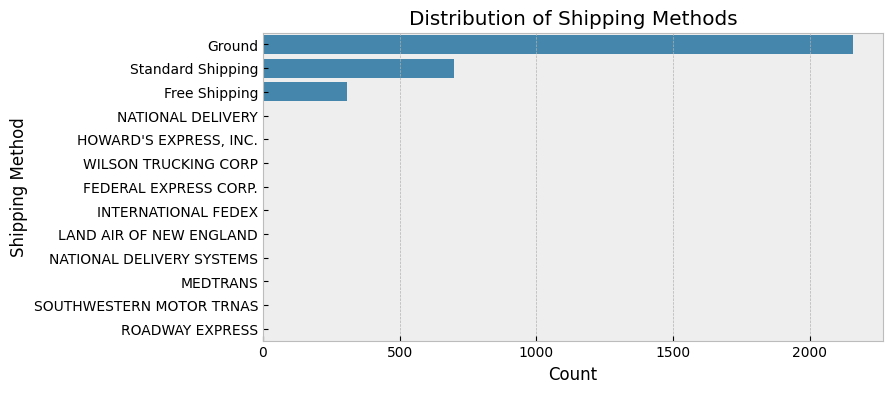

In [188]:
plt.figure(figsize=(8, 4))

sns.countplot(
    data=df_orders,
    y='Orders.shipping_method',
    order=df_orders['Orders.shipping_method'].value_counts().index
)

plt.title('Distribution of Shipping Methods')
plt.xlabel('Count')
plt.ylabel('Shipping Method')
plt.show()

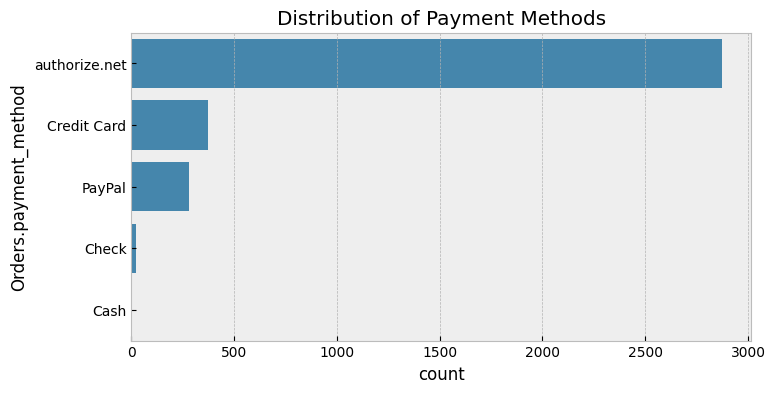

In [189]:
plt.figure(figsize=(8, 4))

sns.countplot(
    data=df_orders,
    y='Orders.payment_method',
    order=df_orders['Orders.payment_method'].value_counts().index
)

plt.title('Distribution of Payment Methods')
plt.show()

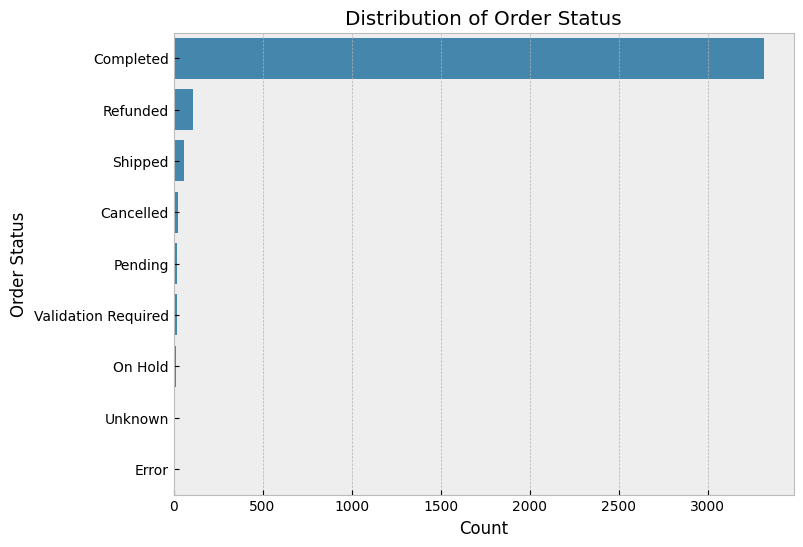

In [190]:
plt.figure(figsize=(8, 6))

sns.countplot(
    data=df_orders,
    y='Orders.status',
    order=df_orders['Orders.status'].value_counts().index
)

plt.title('Distribution of Order Status')
plt.xlabel('Count')
plt.ylabel('Order Status')
plt.show()



In [119]:
pd.crosstab(
    df_orders['Orders.payment_method'],
    df_orders['Orders.payment_status'],
    normalize='index'
) * 100

Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.payment_method,,,,
Cash,100.000000,0.000000,0.000000,0.000000
Check,100.000000,0.000000,0.000000,0.000000
Credit Card,97.035040,0.000000,1.347709,1.617251
PayPal,100.000000,0.000000,0.000000,0.000000
authorize.net,98.677341,1.322659,0.000000,0.000000


C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\2407057966.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=df_orders.groupby('Orders.payment_method')['Orders.total']


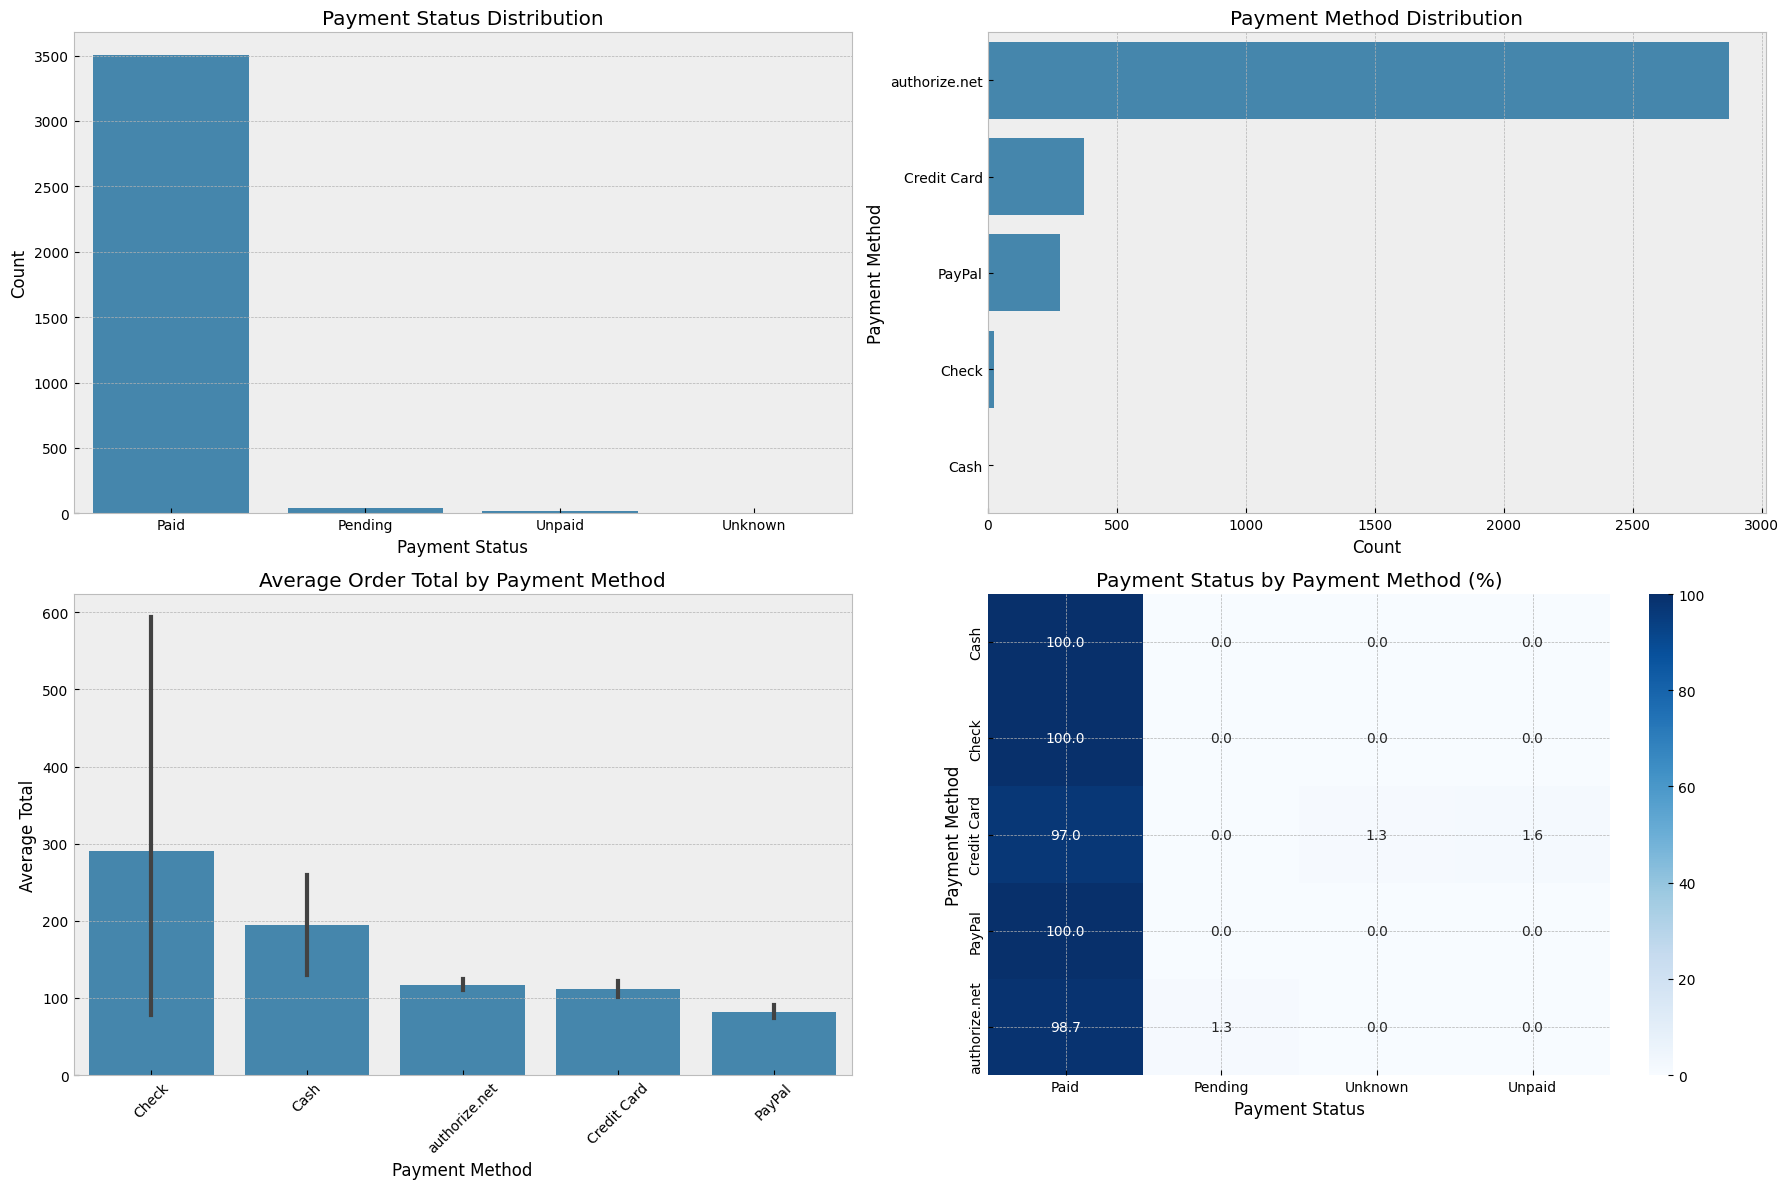

In [191]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# === 1. Payment Status Distribution ===
sns.countplot(
    data=df_orders,
    x='Orders.payment_status',
    order=df_orders['Orders.payment_status'].value_counts().index,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Payment Status Distribution')
axes[0, 0].set_xlabel('Payment Status')
axes[0, 0].set_ylabel('Count')


# === 2. Payment Method Distribution ===
sns.countplot(
    data=df_orders,
    y='Orders.payment_method',
    order=df_orders['Orders.payment_method'].value_counts().index,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Payment Method Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Payment Method')


# === 3. Average Order Total by Payment Method ===
sns.barplot(
    data=df_orders,
    x='Orders.payment_method',
    y='Orders.total',
    estimator='mean',
    order=df_orders.groupby('Orders.payment_method')['Orders.total']
                    .mean()
                    .sort_values(ascending=False)
                    .index,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Average Order Total by Payment Method')
axes[1, 0].set_xlabel('Payment Method')
axes[1, 0].set_ylabel('Average Total')
axes[1, 0].tick_params(axis='x', rotation=45)


# === 4. Crosstab: Payment Status by Payment Method ===
ct = pd.crosstab(df_orders['Orders.payment_method'], df_orders['Orders.payment_status'], normalize='index') * 100
sns.heatmap(ct, annot=True, fmt=".1f", cmap='Blues', ax=axes[1, 1])

axes[1, 1].set_title('Payment Status by Payment Method (%)')
axes[1, 1].set_xlabel('Payment Status')
axes[1, 1].set_ylabel('Payment Method')


plt.tight_layout()
plt.show()

In [122]:
orders_per_customer = df_orders['Orders.customer_id'].value_counts()
orders_per_customer

Orders.customer_id
851     18
515     15
1371    15
403     15
1043    14
        ..
59       1
60       1
61       1
62       1
3698     1
Name: count, Length: 3054, dtype: int64

In [124]:
aov_per_customer = df_orders.groupby('Orders.customer_id')['Orders.total'].mean()
aov_per_customer

Orders.customer_id
3        54.360000
4        29.550000
5        41.663333
7        49.140000
8        69.700000
           ...    
3730     16.060000
3732     39.990000
3733    989.100000
3735    129.990000
3736     24.540000
Name: Orders.total, Length: 3054, dtype: float64

In [ ]:
df_orders['has_discount'] = df_orders['Orders.discount_amount'].fillna(0) > 0
discount_usage = df_orders.groupby('Orders.customer_id')['has_discount'].mean()
discount_usage[discount_usage > 0]


Orders.customer_id
10      1.0
11      1.0
13      0.5
21      1.0
25      1.0
       ... 
3473    1.0
3487    1.0
3540    1.0
3653    1.0
3654    1.0
Name: has_discount, Length: 320, dtype: float64

In [ ]:
df_orders[df_orders['has_discount'] == True]


np.float64(0.10478061558611657)

In [141]:
#df_orders

Customers:  3054
Business Customers: 464
Business company:  428
Individual Customers: 2590


In [ ]:
plt.figure(figsize=(8, 4))

sns.histplot(data=df, x='Order_Items.cost', bins=40)

plt.title("Order_Items.cost (USD)")

plt.show()

In [ ]:
small_qty = df[df['Order_Items.qty'] <= 5]

plt.figure(figsize=(6, 4))

sns.histplot(data=small_qty, x='Order_Items.qty', bins=5)

plt.title('Number of Items in an Order (1-5 items)')

plt.show()

In [ ]:
top_company = df['Orders.company'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_company.values, y=top_company.index)
plt.title("Top 10 OrdersCompany")
plt.xlabel("Orders Count")
plt.show()